In [4]:
import subprocess
import sys

# List of packages to install
packages = [
    'numpy', 'pandas', 'matplotlib', 'mpl_toolkits.mplot3d', 'os', 're', 'warnings', 'seaborn',
    'scikit-learn', 'itertools', 'collections', 'adjustText', 'plotly'
]

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Loop through the list of packages and install them if not already installed
for package in packages:
    try:
        __import__(package)
    except ImportError:
        install(package)

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 38.2 MB/s eta 0:00:00 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached scikit_learn-1.5.2-cp39-cp39-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp39-cp39-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [2]:
#importing and loading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import re
import warnings
import seaborn
from sklearn import (metrics, tree)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, auc, confusion_matrix, precision_score,
                             recall_score, roc_auc_score, roc_curve, classification_report)
from sklearn.model_selection import (cross_val_score, cross_validate, train_test_split, StratifiedShuffleSplit)
from sklearn.preprocessing import (OneHotEncoder, label_binarize, StandardScaler)
from sklearn.svm import SVC
from sklearn.tree import (DecisionTreeClassifier, export_graphviz)
from itertools import cycle
from sklearn.pipeline import make_pipeline
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
from adjustText import adjust_text
import plotly.express as px

In [4]:
#load the all_filtered_tfs.csv into a dataframe
#'''
#kallisto
data1 = pd.read_csv('../Factoromer_files/Kall_filtered_tfs_Tomoki.csv')
data2 = pd.read_csv('../Factoromer_files/Kall_filtered_TFs.csv')
data3 = pd.read_csv('../Factoromer_files/Kall_filtered_tfs_ZhenMa.csv')

# Concatenate the dataframes instead of adding them
data = pd.concat([data1, data2, data3], ignore_index=True)

#mapper to combine sra ids and cell identity? Or should I just build this into the all_filtered_tfs.R? Kinda annoying but also likely a one line addition...
data['SRA_state'] = data['SRA'] + "_" + data['cell_identity']

#attach external gene name to enst id so you have isoforms seperated and also know the isoforms
data['gene_isoforms'] = data['external_gene_name'] + "_" + data['target_id']
#'''

#salmon
'''
data = pd.read_csv('/scratch/projects/truonglab/Salmon_pseudoaligns/Sall_filtered_tfs.csv')
data['SRA_state'] = data['SRA'] + "_" + data['cell_identity']
data['gene_isoforms'] = data['external_gene_name'] + "_" + data['Name']
'''

data

,target_id,length,eff_length,est_counts,tpm,external_gene_name,cell_identity,SRA,SRA_state,gene_isoforms
0,ENST00000000442.11,2274,2005.98,620.5180,10.787200,ESRRA,hiPSC,PGP1_1,PGP1_1_hiPSC,ESRRA_ENST00000000442.11
1,ENST00000005082.13,2021,1752.98,232.1220,4.617640,ZNF195,hiPSC,PGP1_1,PGP1_1_hiPSC,ZNF195_ENST00000005082.13
2,ENST00000007699.10,1654,1385.98,132.5370,3.334720,YBX2,hiPSC,PGP1_1,PGP1_1_hiPSC,YBX2_ENST00000007699.10
3,ENST00000020945.4,2180,1911.98,4.0000,0.072955,SNAI2,hiPSC,PGP1_1,PGP1_1_hiPSC,SNAI2_ENST00000020945.4
4,ENST00000054650.9,1361,1092.98,123.9960,3.956160,THAP3,hiPSC,PGP1_1,PGP1_1_hiPSC,THAP3_ENST00000054650.9
...,...,...,...,...,...,...,...,...,...,...
703418,ENST00000711173.1,4507,4286.04,298.6530,3.835870,ZBED1,BM_MSC,BM-MSC-P4,BM-MSC-P4_BM_MSC,ZBED1_ENST00000711173.1
703419,ENST00000711398.1,3637,3416.04,17.7699,0.286361,ZNF436,BM_MSC,BM-MSC-P4,BM-MSC-P4_BM_MSC,ZNF436_ENST00000711398.1
703420,ENST00000711404.1,3637,3416.04,17.7699,0.286361,ZNF436,BM_MSC,BM-MSC-P4,BM-MSC-P4_BM_MSC,ZNF436_ENST00000711404.1
703421,ENST00000713543.1,3115,2894.04,34.0000,0.646736,SPI1,BM_MSC,BM-MSC-P4,BM-MSC-P4_BM_MSC,SPI1_ENST00000713543.1


In [5]:
unique_sra_states = data['SRA_state'].unique()
print(unique_sra_states)

['PGP1_1_hiPSC' 'PGP1_3_hiPSC' 'cTEC_2_cTEC' 'PGP1_2_hiPSC' 'cTEC_1_cTEC'
 'cTEC_3_cTEC' 'cTEC_4_cTEC' 'ERR11039716_Tcells_WT_Jeko1coculture'
 'ERR11039707_Tcells_WT_monoculture' 'SRR28457601_Mesoderm'
 'SRR28359591_cordbloodHSCderived-DC2'
 'SRR23470155_cardiacfibroblast_TGFB-48hrs'
 'SRR23470159_cardiacfibroblast_Ctrl-48hrs' 'ERR7056414_hiPSC'
 'SRR23362776_Neuron' 'SRR23470156_cardiacfibroblast_TGFB-48hrs'
 'SRR28359575_ipscderived-DC1' 'SRR13394456_M2'
 'SRR28359584_ipscderived-DC2' 'SRR23470154_cardiacfibroblast_TGFB-48hrs'
 'SRR5676940_3Dcorticoid_Neuron_day130'
 'SRR23470151_cardiacfibroblast_Ctrl-72hrs'
 'SRR28359588_cordbloodHSCderived-DC2' 'ERR11039711_Tcells_WT_monoculture'
 'SRR28359586_cordbloodHSCderived-DC1'
 'SRR5676941_3Dcorticoid_Neuron_day130' 'SRR27332192_NK_ctrl'
 'SRR28359581_ipscderived-DC1' 'SRR23362788_Neuron_day10'
 'ERR11039714_Tcells_CARCCR7_Jeko1coculture' 'SRR28359585_ipscderived-DC2'
 'ERR11039713_Tcells_CARCCR7_monoculture' 'SRR27332191_NK_CMV'
 'ERR1103

In [6]:
#Kallisto
#'''

#create a smaller table with just the 3 columns of interest
data_filt = data[['gene_isoforms', 'tpm', 'SRA_state']]

#pivot the smaller table to get SRA_state as column names and genes+enst ids as the columns
pivot_df = data_filt.pivot_table(index='SRA_state', columns='gene_isoforms', values='tpm').fillna(0)
#'''

#Salmon
'''
#create a smaller table with just the 3 columns of interest
data_filt = data[['gene_isoforms', 'TPM', 'SRA_state']]

#pivot the smaller table to get SRA_state as column names and genes+enst ids as the columns
pivot_df = data_filt.pivot_table(index='SRA_state', columns='gene_isoforms', values='TPM').fillna(0)

'''
#filtering to include only cols where at least one value is 0. Just to be extra safe.
filtered_pivot_df = pivot_df.loc[:, (pivot_df == 0).any(axis=0)]

filtered_pivot_df

gene_isoforms,ADNP2_ENST00000262198.9,ADNP2_ENST00000559951.5,ADNP2_ENST00000560561.1,ADNP2_ENST00000560752.5,ADNP2_ENST00000561195.1,ADNP_ENST00000349014.8,ADNP_ENST00000371602.9,ADNP_ENST00000396029.8,ADNP_ENST00000396032.8,ADNP_ENST00000621696.5,...,ZZZ3_ENST00000370801.8,ZZZ3_ENST00000414381.5,ZZZ3_ENST00000433749.5,ZZZ3_ENST00000458763.2,ZZZ3_ENST00000463166.5,ZZZ3_ENST00000469944.1,ZZZ3_ENST00000474746.1,ZZZ3_ENST00000476195.5,ZZZ3_ENST00000476275.5,ZZZ3_ENST00000481346.5
SRA_state,,,,,,,,,,,,,,,,,,,,,
AD-MSC-P4-1_AD_MSC,12.33200,0.000000,0.000000,0.667208,2.67255,7.02395,1.463210,5.99203,21.35040,1.605570,...,9.64734,1.403320,0.000000,1.543060,7.67296,1.359170,0.000000,1.971350,0.950516,0.381282
AD-MSC-P4-2_AD_MSC,11.61960,0.235359,0.576475,1.432710,0.00000,12.23380,1.150440,6.88017,12.28730,2.088240,...,8.16041,2.946330,0.000000,1.479090,7.77228,0.634038,0.000000,2.109340,1.756910,0.501522
BM-MSC-P4_BM_MSC,10.98280,0.369665,0.392210,0.512519,0.00000,6.97562,1.378130,6.77364,18.67880,2.388670,...,10.59060,3.719170,0.000000,0.394724,6.92614,0.520628,0.000000,1.088930,1.274390,0.729323
BM-MSC_BM_MSC,11.45510,0.305745,0.326221,1.282390,5.20651,6.27355,2.847150,4.86335,14.03750,2.211010,...,7.35729,2.633230,0.000000,5.029900,6.39012,1.861150,0.000000,1.481900,2.234400,0.303828
BSP-MP6_BSP_MSC,6.68061,0.000000,0.133691,0.882783,2.11910,6.08698,3.380440,2.38606,5.05884,0.774791,...,5.84534,0.996734,1.130020,3.022980,3.76839,2.911980,0.666142,0.000000,1.665300,0.275700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cTEC_2_cTEC,20.25030,0.000000,0.000000,0.000000,6.60266,21.66180,0.163821,5.21403,8.64354,1.594600,...,10.26020,0.000000,0.000000,1.259510,6.83063,0.495453,0.000000,1.076020,0.496523,0.958979
cTEC_3_cTEC,19.97900,1.162220,0.616471,0.000000,0.00000,13.18250,0.178503,5.55378,10.93270,2.633920,...,11.38460,3.670730,1.331720,0.520926,5.32068,0.419732,0.000000,1.154860,0.139717,0.724943
cTEC_4_cTEC,19.97900,1.162220,0.616471,0.000000,0.00000,13.18250,0.178503,5.55378,10.93270,2.633920,...,11.38460,3.670730,1.331720,0.520926,5.32068,0.419732,0.000000,1.154860,0.139717,0.724943


# PCA

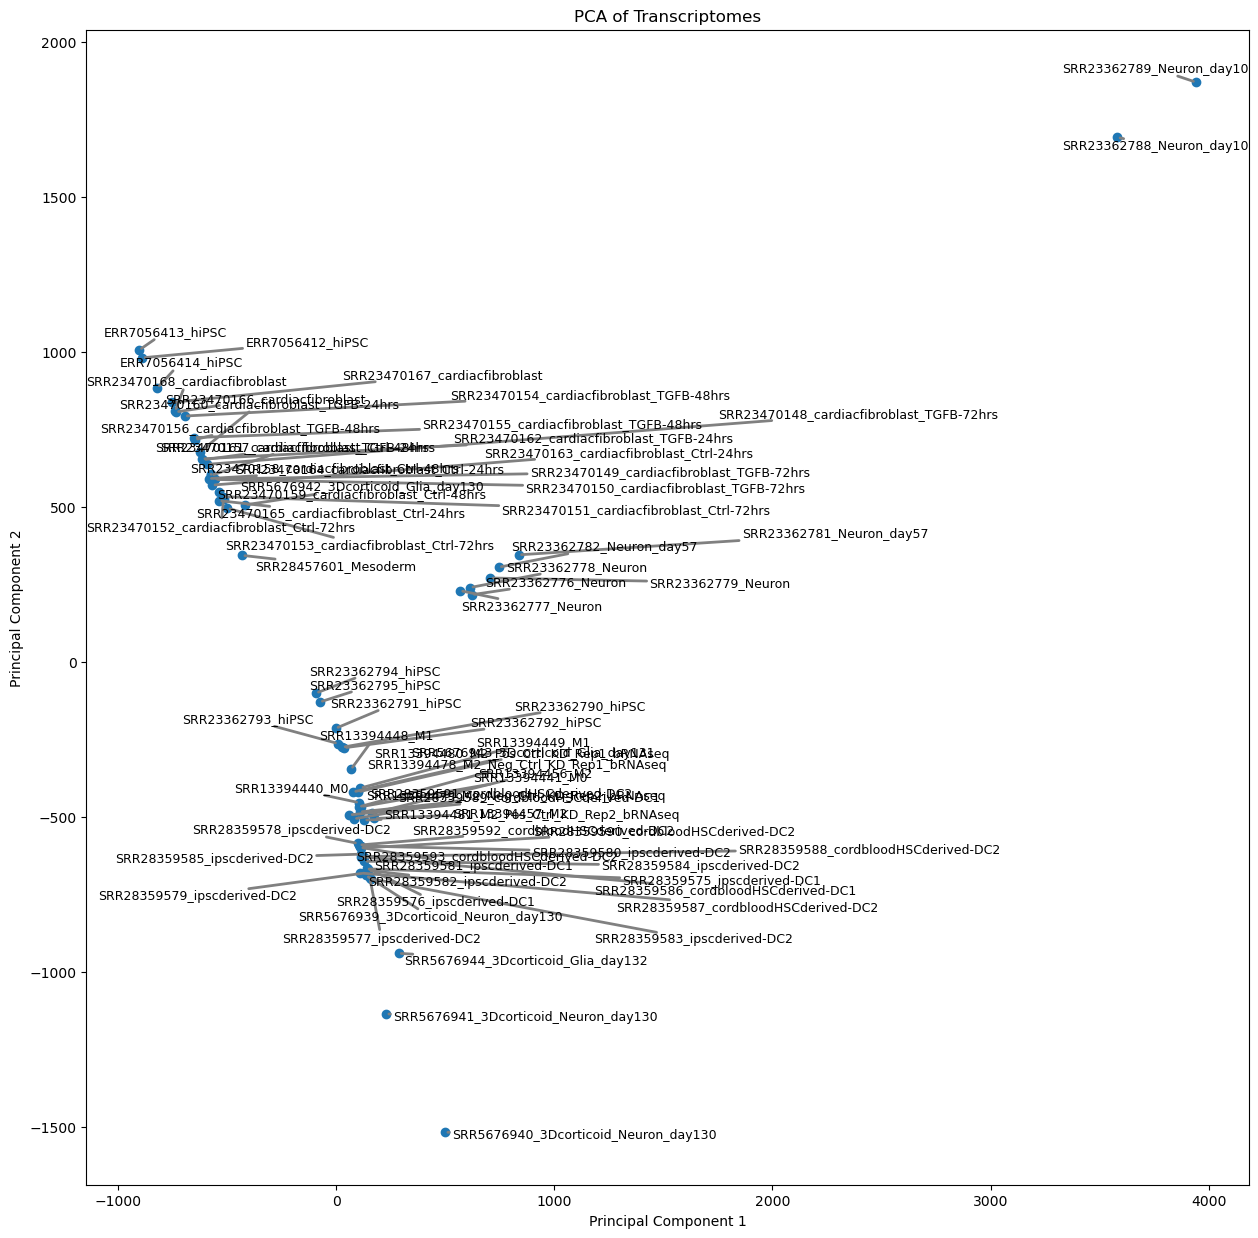

In [4]:
# Perform PCA on the numeric data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pivot_df)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the labels (SRA_state) to the PCA DataFrame
pca_df['label'] = pivot_df.index

# Plot the PCA with labels
plt.figure(figsize=(15, 15))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Annotate each point with its label
texts = []
for i, row in pca_df.iterrows():
    texts.append(plt.text(row['PC1'], row['PC2'], row['label'], fontsize=9))

# Adjust the text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=2))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Transcriptomes')

plt.savefig('2component_PCA.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

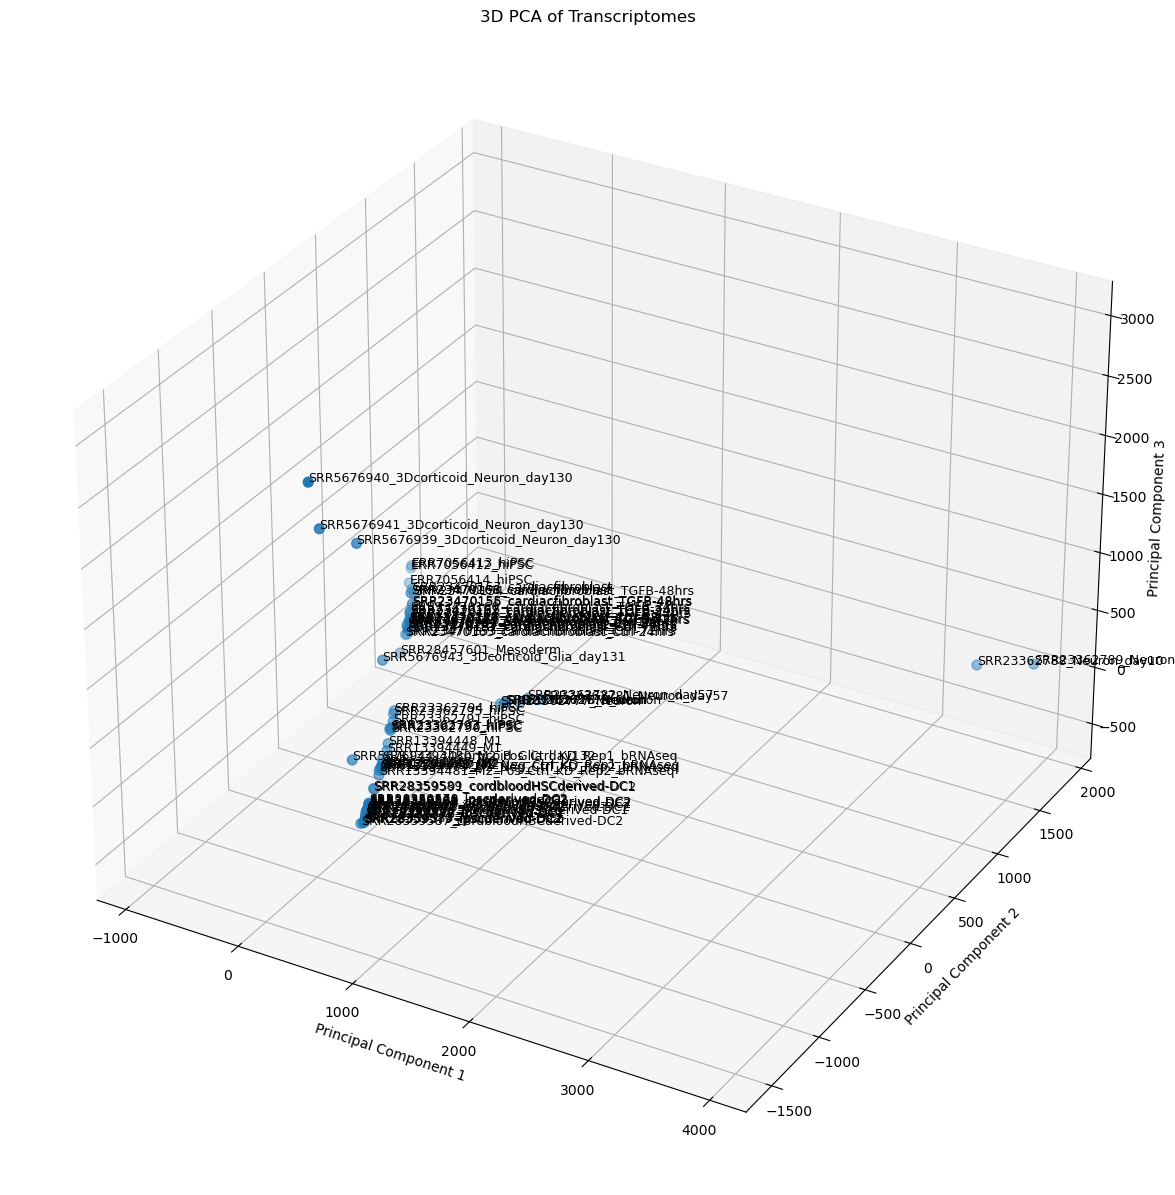

In [5]:
# Perform PCA on the numeric data with three components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(pivot_df)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Add the labels (SRA_state) to the PCA DataFrame
pca_df['label'] = pivot_df.index

# Create a 3D plot for the three principal components
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D space
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], s=50)

# Annotate each point with its label in 3D space
texts = []
for i, row in pca_df.iterrows():
    texts.append(ax.text(row['PC1'], row['PC2'], row['PC3'], row['label'], fontsize=9))

# 3D plots don't support adjustText natively, so this part is omitted in 3D

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Transcriptomes')

plt.savefig('3component_PCA.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

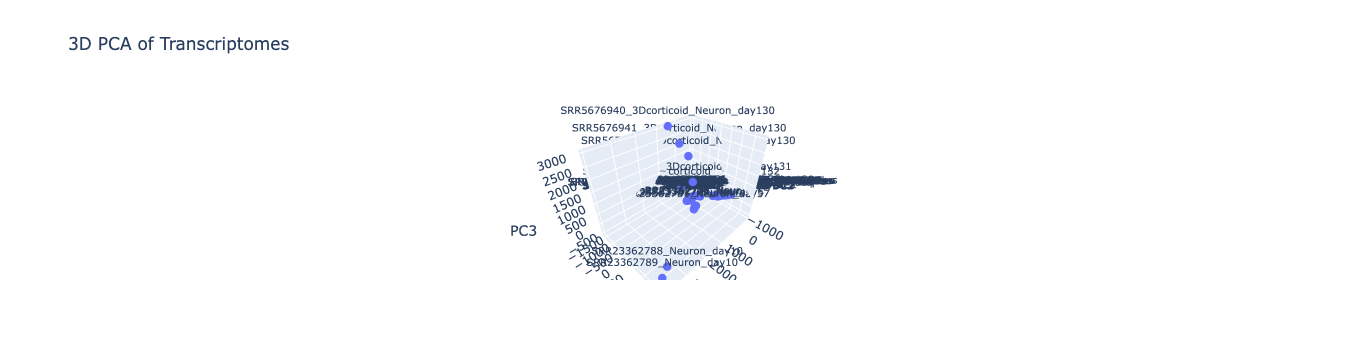

In [68]:
# Perform PCA on the numeric data with three components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(pivot_df)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Add the labels (SRA_state) to the PCA DataFrame
pca_df['label'] = pivot_df.index

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', text='label', title='3D PCA of Transcriptomes')

# Adjust the marker size and text size
fig.update_traces(marker=dict(size=5), textposition='top center', textfont=dict(size=10))

# Show the plot
fig.show()

# Heatmap

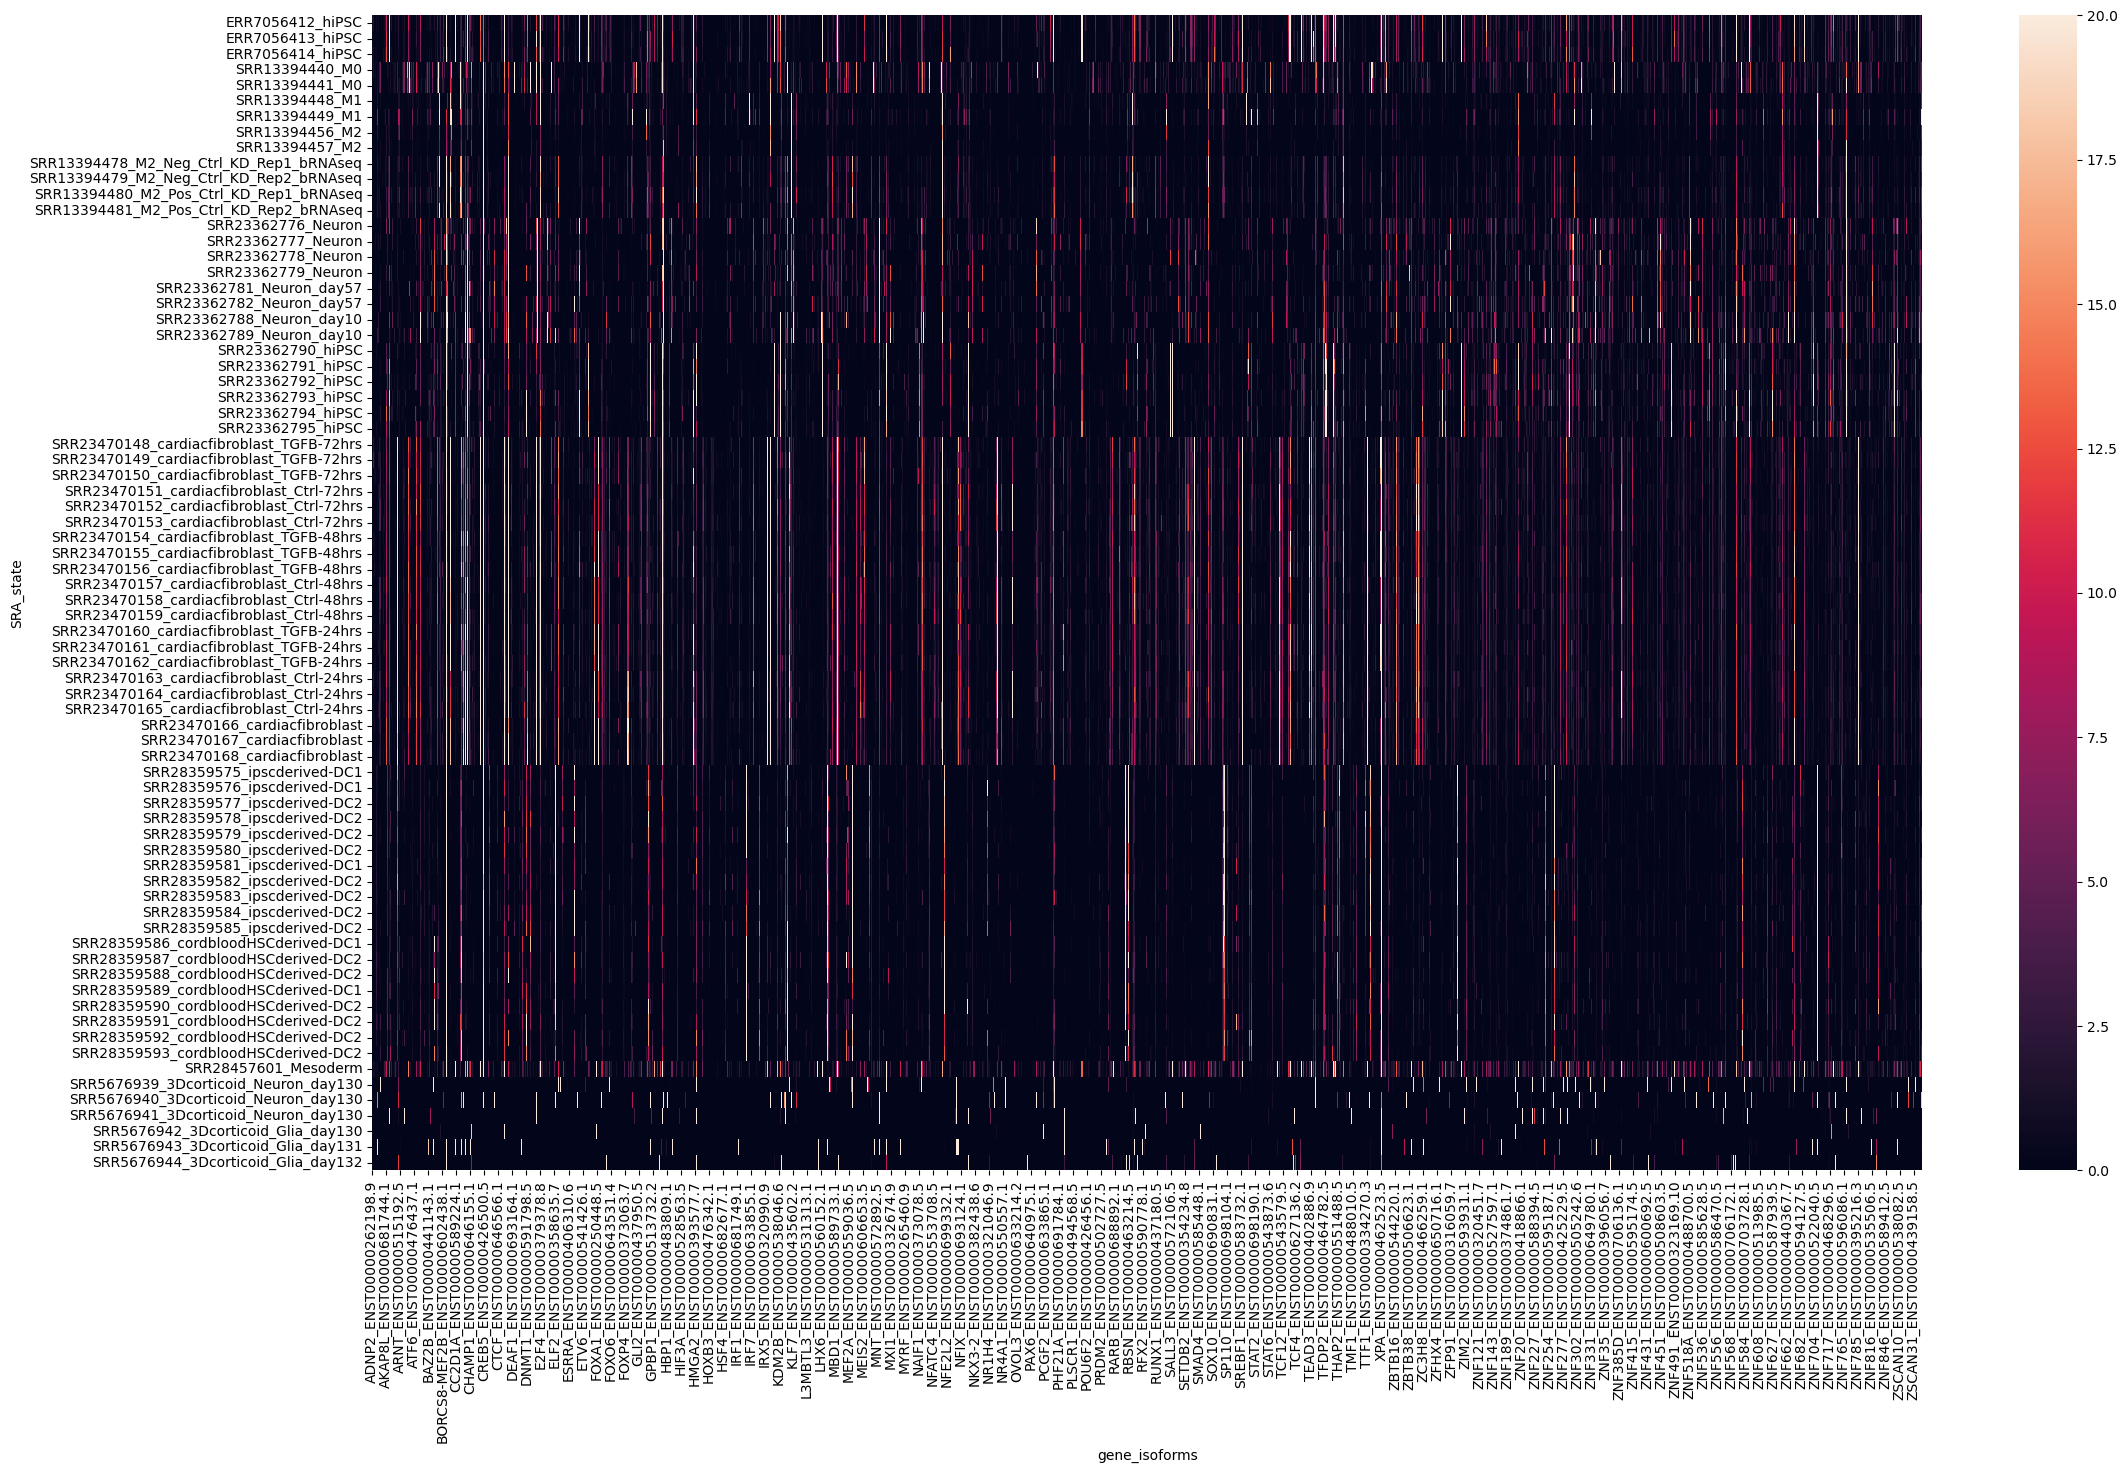

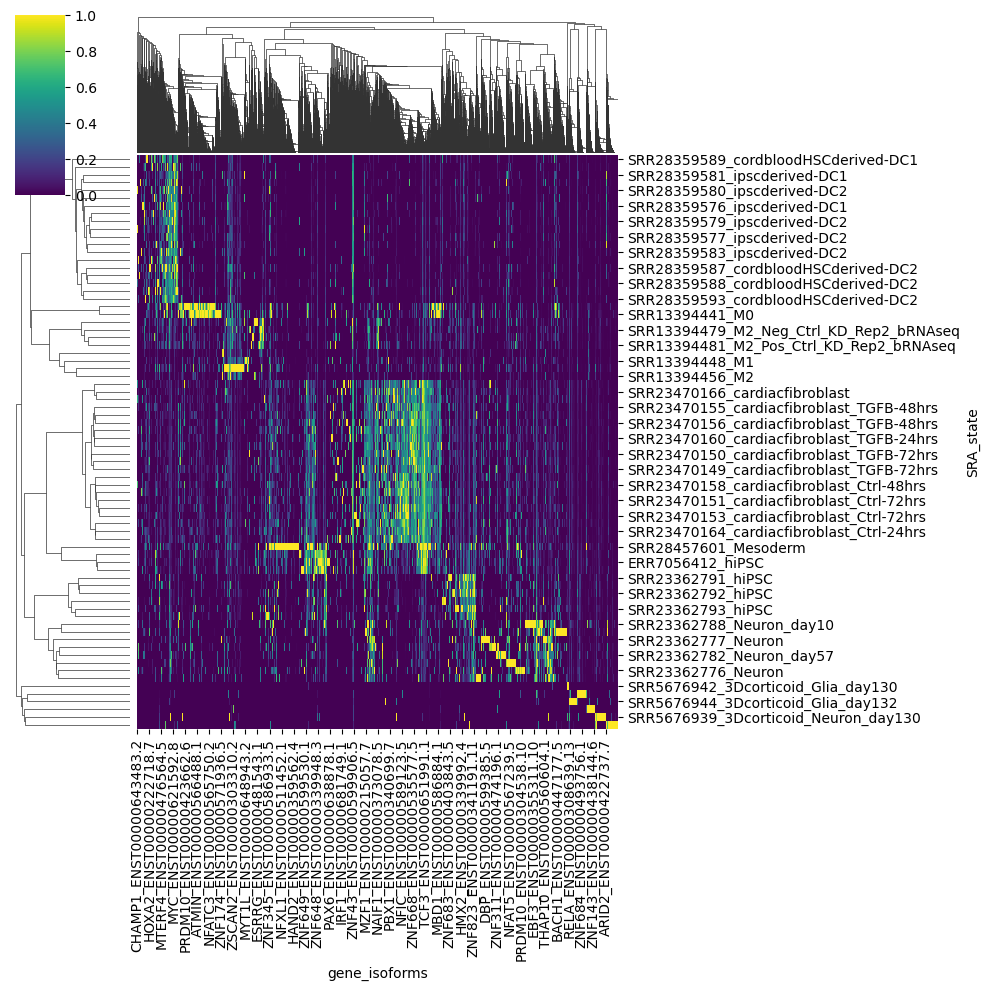

In [6]:
#heatmap with cell state on y axis and target id on x axis
fig, ax = plt.subplots(figsize=(25, 15))
seaborn.heatmap(filtered_pivot_df, vmax=20)

clustermap = seaborn.clustermap(pivot_df, method='average', metric='correlation', cmap='viridis', standard_scale=1)
clustermap.savefig('clustermap.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Train/Test Processing

In [7]:
#filtered_pivot_df = filtered_pivot_df.copy()

#append the cell identity into a new column seperate from the index
filtered_pivot_df.index = filtered_pivot_df.index.astype(str)
filtered_pivot_df['cell_identity'] = [x.split('_')[1] if len(x.split('_')) == 2 else '_'.join(x.split('_')[1:]) for x in filtered_pivot_df.index]

#count occurrences of each cell_identity
cell_identity_counts = filtered_pivot_df['cell_identity'].value_counts()

#create a boolean mask to filter rows with cell_identity occurring more than once
mask = filtered_pivot_df['cell_identity'].isin(cell_identity_counts[cell_identity_counts > 1].index)

#filter the DataFrame using the mask
filtered_pivot_df = filtered_pivot_df[mask]

/var/folders/gl/4s8z78lj6j91bb4dytb1dk7h0000gn/T/ipykernel_53863/1746545173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pivot_df['cell_identity'] = [x.split('_')[1] if len(x.split('_')) == 2 else '_'.join(x.split('_')[1:]) for x in filtered_pivot_df.index]


In [8]:
#seperate the ensmbl ids from the cell_identity column
TFs = filtered_pivot_df.columns.drop(['cell_identity'])

# Rename any value in cell_identity that contains _MSC to just MSC
filtered_pivot_df['cell_identity'] = filtered_pivot_df['cell_identity'].str.replace(r'.*MSC$', 'MSC', regex=True)

# Rename any value in cell_identity that contains 'neuron' (case insensitive) to just 'Neuron'
filtered_pivot_df['cell_identity'] = filtered_pivot_df['cell_identity'].str.replace(r'(?i).*neuron.*', 'Neuron', regex=True)

# Remove the '-XXhrs' from 'cardiacfibroblast_TGFB' and 'cardiacfibroblast_Ctrl'
filtered_pivot_df['cell_identity'] = filtered_pivot_df['cell_identity'].str.replace(r'cardiacfibroblast_TGFB-\d+hrs', 'cardiacfibroblast_TGFB', regex=True)
filtered_pivot_df['cell_identity'] = filtered_pivot_df['cell_identity'].str.replace(r'cardiacfibroblast_Ctrl-\d+hrs', 'cardiacfibroblast_Ctrl', regex=True)

#set predictors and predicted
X = np.array(filtered_pivot_df[TFs])
y = np.array(filtered_pivot_df['cell_identity'])


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('y_test:', y_test)
print('y_train:', y_train)

y_test: ['NK_ctrl' 'MSC' 'MSC' 'Neuron' 'cardiacfibroblast'
 'cardiacfibroblast_TGFB' 'NCSC' 'Neuron' 'cordbloodHSCderived-DC2' 'MSC'
 'NK_ctrl' 'hiPSC' 'MSC' 'ipscderived-DC1' 'Tcells_CARCCR7_monoculture'
 'hiPSC' 'cardiacfibroblast_Ctrl' 'NK_CMV' 'cardiacfibroblast_TGFB'
 'Neuron' 'MSC' 'M2' 'cardiacfibroblast_Ctrl' 'hiPSC'
 'Tcells_CARCCR7_monoculture' 'NCSC' 'cardiacfibroblast_Ctrl']
y_train: ['cordbloodHSCderived-DC2' 'Tcells_CARCCR7_monoculture' 'Neuron'
 'ipscderived-DC2' 'ipscderived-DC2' 'MSC' 'M0' 'cardiacfibroblast_Ctrl'
 'TSC' 'MSC' 'Neuron' 'MSC' 'cardiacfibroblast_TGFB' 'ipscderived-DC2'
 'Neuron' 'M1' 'Tcells_WT_monoculture' 'ipscderived-DC1' 'M1' 'MSC'
 'Neuron' 'cardiacfibroblast_TGFB' 'hiPSC' 'MSC'
 'Tcells_CARCCR7_Jeko1coculture' 'Neuron' 'cordbloodHSCderived-DC2'
 'hiPSC' 'cardiacfibroblast_Ctrl' 'hiPSC' 'Tcells_WT_monoculture' 'hiPSC'
 'MSC' 'Tcells_WT_Jeko1coculture' 'Neuron' 'MSC' 'ipscderived-DC2' 'MSC'
 'cardiacfibroblast_Ctrl' 'cordbloodHSCderived-DC1' 'ipscde

/var/folders/gl/4s8z78lj6j91bb4dytb1dk7h0000gn/T/ipykernel_53863/235559006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pivot_df['cell_identity'] = filtered_pivot_df['cell_identity'].str.replace(r'.*MSC$', 'MSC', regex=True)
/var/folders/gl/4s8z78lj6j91bb4dytb1dk7h0000gn/T/ipykernel_53863/235559006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pivot_df['cell_identity'] = filtered_pivot_df['cell_identity'].str.replace(r'(?i).*neuron.*', 'Neuron', regex=True)
/var/folders/gl/4s8

# Logistic Regression

In [9]:
clf_logistic = LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', max_iter=100)
#clf_logistic.fit(X_train, y_train)

#just put all the data into the training. We don't care about testing do we? Just the coefficients
#that come out of the classification system
clf_logistic.fit(X, y)

/Users/sheanfuphen/repos/Factoromer/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sheanfuphen/repos/Factoromer/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga')

/Users/sheanfuphen/repos/Factoromer/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/sheanfuphen/repos/Factoromer/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/sheanfuphen/repos/Factoromer/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/sheanfuphen/repos/Factoromer/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/sheanfuphen/repos/Factoromer/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: 

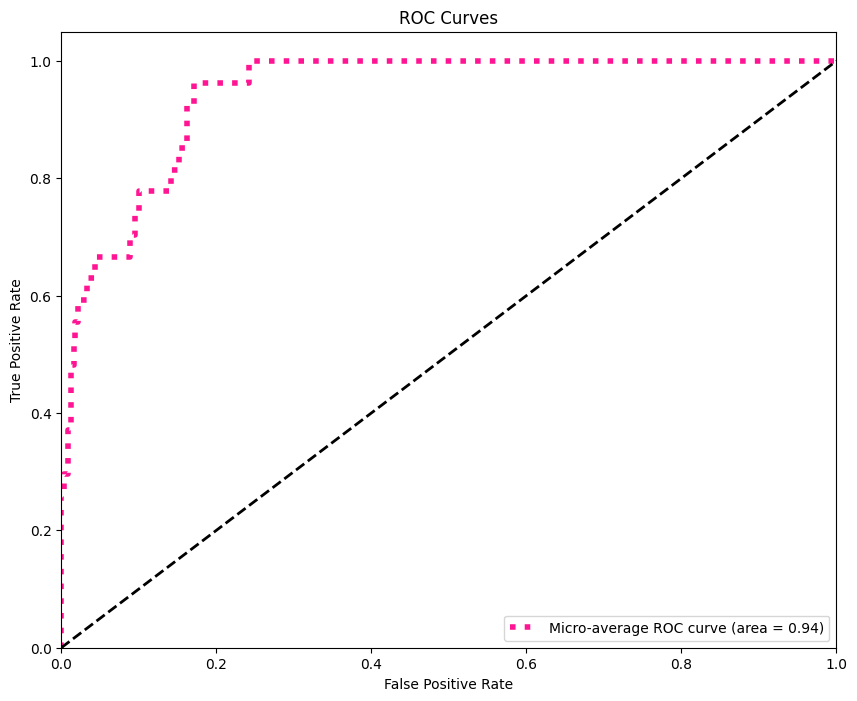

In [10]:
#NOTE: This is a completely pointless graph if we are training on the entire data set!

# Binarize the output labels for multi-class ROC AUC
classes = np.unique(np.concatenate((y_train, y_test)))  #ensure all possible labels are included
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

#compute the ROCs
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes):  #using enumerate to track both index and class label
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_bin[:, i], clf_logistic.predict_proba(X_test)[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

#compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), clf_logistic.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#plotting
%matplotlib inline
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

'''
colors = plt.cm.viridis(np.linspace(0, 1, n_classes))
for class_label, color in zip(classes, colors):
    plt.plot(fpr[class_label], tpr[class_label], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_label, roc_auc[class_label]))
'''
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [28]:
# Initialize an empty list to store the coefficients for each class
all_coefs = []

feature_names = np.array(TFs)
class_labels = clf_logistic.classes_

# Looping through all classes to get a coefficient for each TF per class
for index, class_coefs in enumerate(clf_logistic.coef_):
    class_name = class_labels[index] if index < len(class_labels) else f"Class_{index}"
    coef_df = pd.DataFrame({
        'TF': feature_names,
        'Coefficient': class_coefs,
        'cell_identity': class_name
    })
    all_coefs.append(coef_df)

# Concatenate all the coefficient DataFrames
all_coefs_df = pd.concat(all_coefs).reset_index(drop=True)

all_coefs_df


,TF,Coefficient,cell_identity
0,ADNP2_ENST00000262198.9,-1.448284e-06,M0
1,ADNP2_ENST00000559951.5,0.000000e+00,M0
2,ADNP2_ENST00000560561.1,0.000000e+00,M0
3,ADNP2_ENST00000560752.5,2.427960e-07,M0
4,ADNP2_ENST00000561195.1,-1.039332e-06,M0
...,...,...,...
287469,ZZZ3_ENST00000469944.1,-3.983427e-06,ipscderived-DC2
287470,ZZZ3_ENST00000474746.1,-5.710707e-08,ipscderived-DC2
287471,ZZZ3_ENST00000476195.5,-2.629581e-07,ipscderived-DC2
287472,ZZZ3_ENST00000476275.5,-1.360209e-07,ipscderived-DC2


In [29]:
#saving the df of coefficients, TFs, and cell types to a csv
#all_coefs_df.to_csv('/scratch/projects/truonglab/Kallisto_pseudoaligns/Kall_coefs.csv')
#all_coefs_df.to_csv('/scratch/projects/truonglab/Salmon_pseudoaligns/Sall_coefs.csv')
#all_coefs_df.to_csv('/scratch/sp7512/thesis/ZhenMa_coefs.csv')
all_coefs_df.to_csv('all_tomo_zm_coeffs_cardiac_neurons_mscs_grouped_L1_iter100.csv')

In [92]:
#initializing an empty df for the tfs with the highest and lowest coefficients for each cell type
strongest_tfs = pd.DataFrame()

#iterating through each cell type for the top and bottom tfs and appending them into the strongest tfs df
#and also printing them out for easy copy and post to the results section of my report
for cell in all_coefs_df['cell_identity'].unique():
    subset = all_coefs_df[all_coefs_df['cell_identity'] == cell]
    sorted_subset = subset.sort_values(by='Coefficient', ascending=False)

    #get the 10 at the head and tail
    top_tfs = sorted_subset.head(10)
    bottom_tfs = sorted_subset.tail(10)
    strongest_tfs = pd.concat([top_tfs, bottom_tfs], ignore_index=True)


    print(f"Top 10 TFs for {cell}:")
    print(top_tfs)
    print("\n")
    print(f"Bottom 10 TFs for {cell}:")
    print(bottom_tfs)
    print("\n")

Top 10 TFs for AD_MSC:
                           TF  Coefficient cell_identity
5233  PRRX1_ENST00000367760.7     0.042140        AD_MSC
6190  STAT1_ENST00000392322.7     0.030509        AD_MSC
7017  TRPS1_ENST00000519674.1     0.030225        AD_MSC
7155   YBX3_ENST00000540975.5     0.022086        AD_MSC
2159   HIC1_ENST00000399849.4     0.020742        AD_MSC
4404  NR2F2_ENST00000559679.1     0.018923        AD_MSC
5916  SNAI2_ENST00000396822.6     0.017362        AD_MSC
5915  SMYD3_ENST00000630181.2     0.016829        AD_MSC
1172  DRAP1_ENST00000312515.7     0.015426        AD_MSC
6429   TBX2_ENST00000240328.4     0.014859        AD_MSC


Bottom 10 TFs for AD_MSC:
                            TF  Coefficient cell_identity
1595     FOS_ENST00000556324.2    -0.015489        AD_MSC
2389   HOXB6_ENST00000490419.1    -0.016109        AD_MSC
2074   HAND1_ENST00000231121.3    -0.017326        AD_MSC
4875  PITX1_ENST00000265340.12    -0.019107        AD_MSC
5031  POU5F1_ENST00000437747.6  

In [48]:
subset = all_coefs_df[all_coefs_df['cell_identity'] == 'M1']
sorted_subset = subset.sort_values(by='Coefficient', ascending=False)

#get the 25 at the head and tail
top_tfs = sorted_subset.head(25)
bottom_tfs = sorted_subset.tail(25)
strongest_tfs = pd.concat([top_tfs, bottom_tfs], ignore_index=True)


print(f"Top 25 TFs:")
print(top_tfs)
print("\n")
print(f"Bottom 25 TFs:")
print(bottom_tfs)
print("\n")

Top 10 TFs:
                              TF  Coefficient cell_identity
20584  TSC22D1_ENST00000261489.7     0.227930            M1
19544     SPI1_ENST00000378538.8     0.113863            M1
15748      JUN_ENST00000678696.1     0.071157            M1
20656     USF2_ENST00000600341.5     0.057046            M1
19543     SPI1_ENST00000227163.8     0.043847            M1
13228    CEBPB_ENST00000303004.5     0.039361            M1
15426     IRF1_ENST00000245414.9     0.038900            M1
15427     IRF1_ENST00000405885.6     0.035584            M1
15116    HMGA1_ENST00000311487.9     0.031449            M1
19629    STAT1_ENST00000424722.6     0.029005            M1
19647    STAT1_ENST00000673942.1     0.027671            M1
19623    STAT1_ENST00000361099.8     0.027473            M1
13789  DNTTIP1_ENST00000372622.8     0.027397            M1
22834   ZNF430_ENST00000597922.1     0.026430            M1
15577     IRF7_ENST00000621391.4     0.025835            M1
24407   ZNF766_ENST000006017

In [49]:
subset = all_coefs_df[all_coefs_df['cell_identity'] == 'M2']
sorted_subset = subset.sort_values(by='Coefficient', ascending=False)

#get the 25 at the head and tail
top_tfs = sorted_subset.head(25)
bottom_tfs = sorted_subset.tail(25)
strongest_tfs = pd.concat([top_tfs, bottom_tfs], ignore_index=True)


print(f"Top 25 TFs:")
print(top_tfs)
print("\n")
print(f"Bottom 25 TFs:")
print(bottom_tfs)
print("\n")

Top 25 TFs:
                              TF  Coefficient cell_identity
33095  TSC22D1_ENST00000261489.7     0.302503            M2
31859      SON_ENST00000492229.1     0.126078            M2
30278    PA2G4_ENST00000552766.5     0.098550            M2
28427     KLF6_ENST00000173785.4     0.064306            M2
36713   ZNF706_ENST00000521272.5     0.028640            M2
28428     KLF6_ENST00000380946.3     0.024844            M2
26466     EGR2_ENST00000242480.4     0.024383            M2
31369  RHOXF2B_ENST00000371402.5     0.022804            M2
29327      MYC_ENST00000524013.2     0.020937            M2
27632    HMGA1_ENST00000478214.1     0.019978            M2
25565  BHLHE40_ENST00000256495.4     0.013262            M2
30993     PREB_ENST00000260643.7     0.012516            M2
29935     NME2_ENST00000393190.4     0.011242            M2
27363    GTF2I_ENST00000443166.5     0.010741            M2
31135     RBPJ_ENST00000504423.2     0.008787            M2
25822   CHCHD3_ENST000004579

# Filtering for Specific Cell Types (optional)

In [44]:
data2 = data[data['cell_identity'].isin(['M1', 'M2', 'M0'])]
data2.loc[:, 'SRA_state'] = data2['SRA'] + "_" + data2['cell_identity']
data2.loc[:, 'gene_isoforms'] = data2['external_gene_name'] + "_" + data2['target_id']

#create a smaller table with just the 3 columns of interest
data2_filt = data2[['gene_isoforms', 'tpm', 'SRA_state']]

#pivot the smaller table to get SRA_state as column names and genes+enst ids as the columns
pivot_df2 = data2_filt.pivot_table(index='SRA_state', columns='gene_isoforms', values='tpm').fillna(0)

#filtering to include only cols where at least one value is 0. Just to be extra safe.
filtered_pivot_df2 = pivot_df2.loc[:, (pivot_df2 == 0).any(axis=0)]

#determine if you need the filter for one value being 0 or not
#filtered_pivot_df2
pivot_df2


gene_isoforms,ADNP2_ENST00000262198.9,ADNP2_ENST00000559951.5,ADNP2_ENST00000560561.1,ADNP2_ENST00000560752.5,ADNP_ENST00000349014.8,ADNP_ENST00000371602.9,ADNP_ENST00000396029.8,ADNP_ENST00000396032.8,ADNP_ENST00000621696.5,ADNP_ENST00000642364.1,...,ZZZ3_ENST00000370798.5,ZZZ3_ENST00000370801.8,ZZZ3_ENST00000414381.5,ZZZ3_ENST00000433749.5,ZZZ3_ENST00000458763.2,ZZZ3_ENST00000463166.5,ZZZ3_ENST00000469944.1,ZZZ3_ENST00000474746.1,ZZZ3_ENST00000476195.5,ZZZ3_ENST00000476275.5
SRA_state,,,,,,,,,,,,,,,,,,,,,
SRR13394440_M0,9.880180,0.000000,0.00000,3.41875,6.57913,0.965760,4.69185,0.960813,0.000000,1.725400,...,1.451640,4.420920,0.000000,0.000000,5.90612,8.632130,0.578581,2.054780,0.000000,0.772103
SRR13394441_M0,9.968580,0.000000,0.00000,1.88983,4.76865,1.550000,4.35018,1.145870,0.211231,0.000000,...,2.781480,4.350690,0.000000,0.000000,3.78027,5.545840,0.210933,0.872266,0.862792,0.406132
SRR13394448_M1,0.426716,0.068142,0.00000,0.00000,0.00000,0.093333,0.00000,0.000000,0.000153,0.292079,...,0.000000,0.215427,0.000000,0.000000,6.76998,0.808349,0.000000,0.000000,0.000000,0.356348
SRR13394449_M1,1.272370,0.000000,0.22464,0.00000,0.00000,0.610864,0.00000,0.000000,0.000047,0.000000,...,0.758128,0.331664,0.000000,0.697989,20.63930,1.825790,0.190874,0.000000,0.000000,0.878955
SRR13394456_M2,0.155226,0.000000,0.00000,0.00000,0.00000,0.254121,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.249778,0.000000,0.000000,6.67575,1.195070,0.000000,0.354456,0.000000,0.464026
SRR13394457_M2,0.418013,0.000000,0.00000,0.00000,0.00000,0.085867,0.36824,0.000000,0.000000,0.000000,...,0.220436,0.304437,0.177738,0.000000,3.81061,0.735837,0.000000,0.000000,0.000000,0.226606


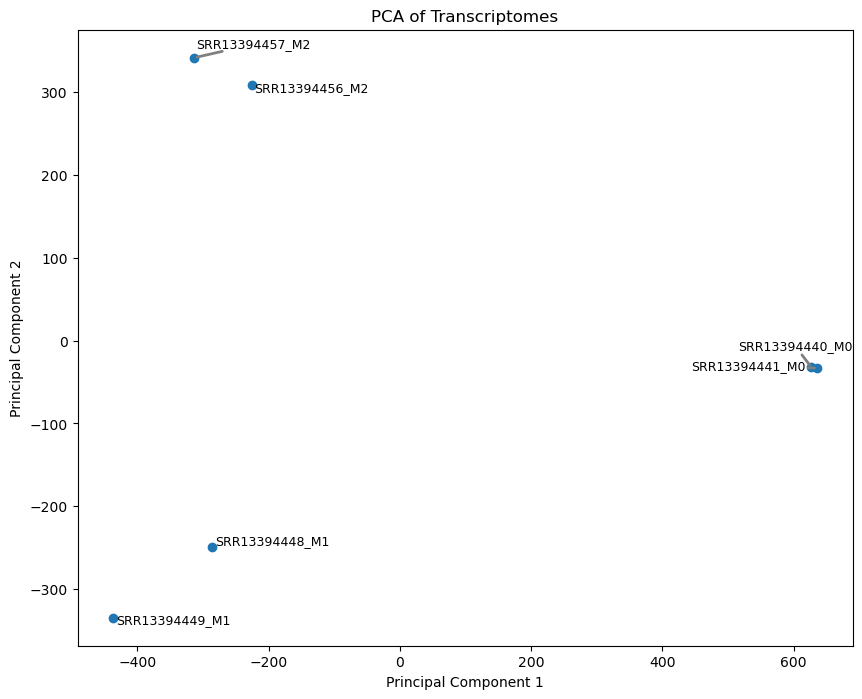

In [60]:
# Perform PCA on the numeric data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pivot_df2)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the labels (SRA_state) to the PCA DataFrame
pca_df['label'] = pivot_df2.index

# Plot the PCA with labels
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Annotate each point with its label
texts = []
for i, row in pca_df.iterrows():
    texts.append(plt.text(row['PC1'], row['PC2'], row['label'], fontsize=9))

# Adjust the text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=2))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Transcriptomes')

plt.show()


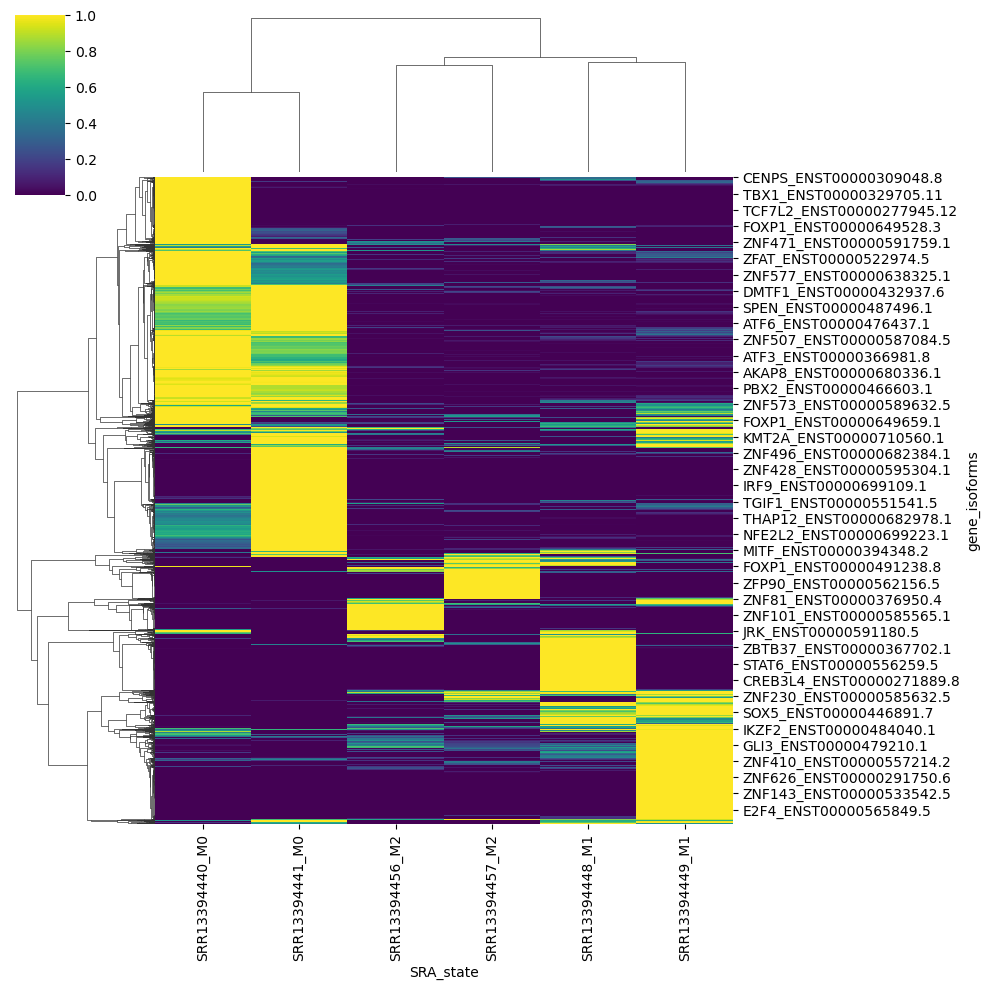

In [40]:
#heatmap with cell state on y axis and target id on x axis
#fig, ax = plt.subplots(figsize=(25, 15))
filtered_pivot_df2_pivot = filtered_pivot_df2.transpose()
seaborn.clustermap(filtered_pivot_df2_pivot, method='average', metric='correlation', cmap='viridis', standard_scale=0)

In [ ]:
#append the cell identity into a new column seperate from the index
filtered_pivot_df.index = filtered_pivot_df.index.astype(str)
filtered_pivot_df['cell_identity'] = [x.split('_')[1] if len(x.split('_')) == 2 else '_'.join(x.split('_')[1:]) for x in filtered_pivot_df.index]

#count occurrences of each cell_identity
cell_identity_counts = filtered_pivot_df['cell_identity'].value_counts()

#create a boolean mask to filter rows with cell_identity occurring more than once
mask = filtered_pivot_df['cell_identity'].isin(cell_identity_counts[cell_identity_counts > 1].index)

#filter the DataFrame using the mask
filtered_pivot_df = filtered_pivot_df[mask]

#seperate the ensmbl ids from the cell_identity column
TFs = filtered_pivot_df.columns.drop(['cell_identity'])

#set predictors and predicted
X = np.array(filtered_pivot_df[TFs])
y = np.array(filtered_pivot_df['cell_identity'])


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('y_test:', y_test)
print('y_train:', y_train)